# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\Public\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points inb resource train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points inb resource train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:57<00:00, 1911.47it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [18]:
#Project essay word count

essay_word_count = []

for ess in project_data["essay"] :
    c = len(ess.split())
    essay_word_count.append(c)
    
project_data["essay_word_count"] = essay_word_count

project_data['preprocessed_essays'] = preprocessed_essays

In [19]:
import nltk
#nltk.download()

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

pos =[]
neg = []
neu = []
compound = []

for a in tqdm(project_data["preprocessed_essays"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|██████████| 109248/109248 [12:57<00:00, 140.47it/s]


In [21]:
project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [22]:
# similarly you can preprocess the titles also

project_data.columns
#sent1= decontracted(project_data['project_title'].values[20000])
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent1 = decontracted(sentance)
    sent1 = sent1.replace('\\r', ' ')
    sent1 = sent1.replace('\\"', ' ')
    sent1 = sent1.replace('\\n', ' ')
    sent1 = re.sub('[^A-Za-z0-9]+', ' ', sent1)
    # https://gist.github.com/sebleier/554280
    sent1 = ' '.join(e for e in sent1.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 33745.90it/s]


In [23]:
#Project title word count
title_word_count = []

for a in project_data["project_title"] :
    b = len(a.split())
    title_word_count.append(b)

project_data["title_word_count"] = title_word_count


project_data['preprocessed_title'] = preprocessed_title

## 1.5 Preparing data for models

In [24]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'essay_word_count',
       'preprocessed_essays', 'pos', 'neg', 'neu', 'compound',
       'title_word_count', 'preprocessed_title'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [25]:
Y=project_data['project_is_approved']

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

column_values=['clean_categories', 'clean_subcategories', 'school_state', 'project_grade_category', 'teacher_prefix','preprocessed_essays','preprocessed_title' ,'price','quantity','teacher_number_of_previously_posted_projects','pos','neg','neu','compound','title_word_count','essay_word_count']

def select_columns(dataframe, column_names):
    new_frame = dataframe.loc[:, column_names]
    return new_frame

process_columns=select_columns(project_data,column_values)

In [26]:
process_columns.head()

clean_categories           clean_subcategories school_state  \
0               Literacy_Language                  ESL Literacy           IN   
1    History_Civics Health_Sports  Civics_Government TeamSports           FL   
2                   Health_Sports    Health_Wellness TeamSports           AZ   
3  Literacy_Language Math_Science          Literacy Mathematics           KY   
4                    Math_Science                   Mathematics           TX   

  project_grade_category teacher_prefix  \
0          Grades PreK-2           Mrs.   
1             Grades 6-8            Mr.   
2             Grades 6-8            Ms.   
3          Grades PreK-2           Mrs.   
4          Grades PreK-2           Mrs.   

                                 preprocessed_essays  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   
2  true champions not always ones win guts by mia...   
3  i work unique school filled esl english second...   
4  our second grade classroom next year made arou...   

                                  preprocessed_title   price  quantity  \
0  when last time used math probably within last ...  154.60        23   
1  when last time used math probably within last ...  299.00         1   
2  when last time used math probably within last ...  516.85        22   
3  when last time used math probably within last ...  232.90         4   
4  when last time used math probably within last ...   67.98         4   

   teacher_number_of_previously_posted_projects    pos    neg    neu  \
0                                             0  0.144  0.012  0.844   
1                                             7  0.283  0.048  0.669   
2                                             1  0.219  0.122  0.659   
3                                             4  0.246  0.106  0.649   
4                                             1  0.143  0.066  0.791   

   compound  title_word_count  essay_word_count  
0    0.9694                 7               272  
1    0.9856                 5               221  
2    0.9816                 7               361  
3    0.9656                 2               213  
4    0.8524                 3               234

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(process_columns, Y, test_size=0.33,random_state=42) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33 ,random_state=42) # this is random splitting


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(49041, 16) (49041,)
(24155, 16) (24155,)
(36052, 16) (36052,)


In [28]:
print("train columns",X_train.columns)

print("cv columns",X_cv.columns)

print("test columns",X_test.columns)

train columns Index(['clean_categories', 'clean_subcategories', 'school_state',
       'project_grade_category', 'teacher_prefix', 'preprocessed_essays',
       'preprocessed_title', 'price', 'quantity',
       'teacher_number_of_previously_posted_projects', 'pos', 'neg', 'neu',
       'compound', 'title_word_count', 'essay_word_count'],
      dtype='object')
cv columns Index(['clean_categories', 'clean_subcategories', 'school_state',
       'project_grade_category', 'teacher_prefix', 'preprocessed_essays',
       'preprocessed_title', 'price', 'quantity',
       'teacher_number_of_previously_posted_projects', 'pos', 'neg', 'neu',
       'compound', 'title_word_count', 'essay_word_count'],
      dtype='object')
test columns Index(['clean_categories', 'clean_subcategories', 'school_state',
       'project_grade_category', 'teacher_prefix', 'preprocessed_essays',
       'preprocessed_title', 'price', 'quantity',
       'teacher_number_of_previously_posted_projects', 'pos', 'neg', 'neu',


### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [29]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_categories= CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

vectorizer_categories.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_categories.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_categories.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_categories.transform(X_cv['clean_categories'].values)

print(vectorizer_categories.get_feature_names())

print("Shape of train matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",categories_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of train matrix after one hot encodig  (49041, 9)
Shape of test matrix after one hot encodig  (36052, 9)
Shape of cv matrix after one hot encodig  (24155, 9)


In [30]:
# we use count vectorizer to convert the values into one 
# splitting subcategories data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_subcategories = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_subcategories.fit(X_train['clean_subcategories'].values)

print(vectorizer_subcategories.get_feature_names())

sub_categories_one_hot_train = vectorizer_subcategories.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_subcategories.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_subcategories.transform(X_cv['clean_subcategories'].values)

print("Shape of train matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",sub_categories_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",sub_categories_one_hot_cv.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of train matrix after one hot encodig  (49041, 30)
Shape of test matrix after one hot encodig  (36052, 30)
Shape of cv matrix after one hot encodig  (24155, 30)


In [31]:
# we use count vectorizer to convert the values of categorical data :school_state
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_schoolstate= CountVectorizer()
vectorizer_schoolstate.fit(X_train['school_state'])

print(vectorizer_schoolstate.get_feature_names())

school_state_one_hot_train = vectorizer_schoolstate.transform(X_train['school_state'].values)
school_state_one_hot_test = vectorizer_schoolstate.transform(X_test['school_state'].values)
school_state_one_hot_cv = vectorizer_schoolstate.transform(X_cv['school_state'].values)

print("Shape of train matrix after one hot encodig ",school_state_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",school_state_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",school_state_one_hot_cv.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of train matrix after one hot encodig  (49041, 51)
Shape of test matrix after one hot encodig  (36052, 51)
Shape of cv matrix after one hot encodig  (24155, 51)


In [32]:
#we use count vectorizer to convert the values of categorical data :project_grade_category
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_project_grade_category = CountVectorizer(stop_words=None)

k=X_train['project_grade_category']
l=X_test['project_grade_category']
m=X_test['project_grade_category']

k.replace(['Grades PreK-2', 'Grades 6-8', 'Grades 3-5','Grades 9-12'], ['A1', 'B2' ,'C3', 'D4'],inplace=True)
l.replace(['Grades PreK-2', 'Grades 6-8', 'Grades 3-5','Grades 9-12'], ['A1', 'B2' ,'C3', 'D4'],inplace=True)
m.replace(['Grades PreK-2', 'Grades 6-8', 'Grades 3-5','Grades 9-12'], ['A1', 'B2' ,'C3', 'D4'],inplace=True)

vectorizer_project_grade_category.fit(k)

project_grade_category_one_hot_train=vectorizer_project_grade_category.transform(X_train['project_grade_category'].values)
project_grade_category_one_hot_test=vectorizer_project_grade_category.transform(X_test['project_grade_category'].values)
project_grade_category_one_hot_cv=vectorizer_project_grade_category.transform(X_cv['project_grade_category'].values)

print("Shape of train matrix after one hot encodig ",project_grade_category_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",project_grade_category_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",project_grade_category_one_hot_cv.shape)

Shape of train matrix after one hot encodig  (49041, 4)
Shape of test matrix after one hot encodig  (36052, 4)
Shape of cv matrix after one hot encodig  (24155, 4)


In [33]:
#we use count vectorizer to convert the values of categorical data : teacher_prefix
# getting error as we have null balues replacing them with 0
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_teacher_prefix = CountVectorizer()
project_data['teacher_prefix'].unique()

X_train['teacher_prefix'].fillna("", inplace = True) 
X_test['teacher_prefix'].fillna("", inplace = True) 
X_cv['teacher_prefix'].fillna("", inplace = True) 

vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values)
print(vectorizer_teacher_prefix.get_feature_names())

teacher_prefix_one_hot_train = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
teacher_prefix_one_hot_test = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)
teacher_prefix_one_hot_cv = vectorizer_teacher_prefix.transform(X_cv['teacher_prefix'].values)

print("Shape of train matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)
print("Shape of cv matrix after one hot encodig ",teacher_prefix_one_hot_cv.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of train matrix after one hot encodig  (49041, 5)
Shape of test matrix after one hot encodig  (36052, 5)
Shape of cv matrix after one hot encodig  (24155, 5)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [34]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow_essay = CountVectorizer(min_df=10, ngram_range =(1,2),max_features=5000)
vectorizer_bow_essay.fit(X_train['preprocessed_essays'])

text_bow_train= vectorizer_bow_essay.transform(X_train['preprocessed_essays'])
text_bow_test= vectorizer_bow_essay.transform(X_test['preprocessed_essays'])
text_bow_cv= vectorizer_bow_essay.transform(X_cv['preprocessed_essays'])

print("Shape of train matrix after one hot encodig ",text_bow_train.shape)
print("Shape of test matrix after one hot encodig ",text_bow_test.shape)
print("Shape of cv matrix after one hot encodig ",text_bow_cv.shape)

Shape of train matrix after one hot encodig  (49041, 5000)
Shape of test matrix after one hot encodig  (36052, 5000)
Shape of cv matrix after one hot encodig  (24155, 5000)


In [35]:
# before you vectorize the title make sure you preprocess it
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow_title = CountVectorizer(min_df=10)
vectorizer_bow_title.fit(X_train['preprocessed_title'])

title_bow_train = vectorizer_bow_title.transform(X_train['preprocessed_title'])
title_bow_test = vectorizer_bow_title.transform(X_test['preprocessed_title'])
title_bow_cv= vectorizer_bow_title.transform(X_cv['preprocessed_title'])

print("Shape of train matrix after one hot encodig title_bow",title_bow_train.shape)
print("Shape of test matrix after one hot encodig title_bow",title_bow_test.shape)
print("Shape of cv matrix after one hot encodig title_bow",title_bow_cv.shape)

Shape of train matrix after one hot encodig title_bow (49041, 132)
Shape of test matrix after one hot encodig title_bow (36052, 132)
Shape of cv matrix after one hot encodig title_bow (24155, 132)


#### 1.5.2.2 TFIDF vectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay= TfidfVectorizer(min_df=10,ngram_range =(1,2),max_features=5000)
vectorizer_tfidf_essay.fit(X_train['preprocessed_essays'])

text_tfidf_train= vectorizer_tfidf_essay.transform(X_train['preprocessed_essays'])
text_tfidf_test= vectorizer_tfidf_essay.transform(X_test['preprocessed_essays'])
text_tfidf_cv = vectorizer_tfidf_essay.transform(X_cv['preprocessed_essays'])

print("Shape of train matrix after one hot encodig ",text_tfidf_train.shape)                                          
print("Shape of test matrix after one hot encodig ",text_tfidf_test.shape)
print("Shape of cv matrix after one hot encodig ",text_tfidf_cv.shape)

Shape of train matrix after one hot encodig  (49041, 5000)
Shape of test matrix after one hot encodig  (36052, 5000)
Shape of cv matrix after one hot encodig  (24155, 5000)


In [37]:
# Similarly you can vectorize for title also

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(X_train['preprocessed_title'])

title_tfidf_train = vectorizer_tfidf_title.transform(X_train['preprocessed_title'])
title_tfidf_test = vectorizer_tfidf_title.transform(X_test['preprocessed_title'])
title_tfidf_cv = vectorizer_tfidf_title.transform(X_cv['preprocessed_title'])

print("Shape of train matrix after one hot encodig ",title_tfidf_train.shape)
print("Shape of test matrix after one hot encodig ",title_tfidf_test.shape)
print("Shape of cv matrix after one hot encodig ",title_tfidf_cv.shape)

Shape of train matrix after one hot encodig  (49041, 132)
Shape of test matrix after one hot encodig  (36052, 132)
Shape of cv matrix after one hot encodig  (24155, 132)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [38]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [39]:
i=0
list_of_sentance_train=[]
for sentance in X_train['preprocessed_essays']:
    list_of_sentance_train.append(sentance.split())

In [40]:
# this line of code trains your w2v model on the give list of sentances
w2v_model=Word2Vec(list_of_sentance_train,min_count=25,size=50, workers=32)

In [41]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 25 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 25 times  8657
sample words  ['my', 'students', 'inquisitive', 'bunch', 'love', 'learn', 'they', 'ask', 'meaningful', 'questions', 'work', 'hard', 'find', 'answers', 'important', 'foundational', 'skills', 'help', 'throughout', 'lives', 'many', 'not', 'support', 'need', 'home', 'build', 'successful', 'we', 'recently', 'acquired', 'title', 'i', 'status', 'meaning', 'large', 'percentage', 'kids', 'school', 'poverty', 'level', 'that', 'makes', 'much', 'get', 'materials', 'second', 'graders', 'use', 'books', 'everything']


In [42]:
# average Word2Vec of essays 
# compute average word2vec for each review.
essay_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    essay_vectors_train.append(sent_vec)
essay_vectors_train = np.array(essay_vectors_train)
print(essay_vectors_train.shape)
print(essay_vectors_train[0])

100%|██████████| 49041/49041 [02:25<00:00, 337.77it/s]


(49041, 50)
[-2.90032371e-01  8.60346435e-01  4.71845976e-01 -9.33003174e-01
 -1.42434026e+00 -7.70083409e-02 -3.17232735e-01 -2.85122908e-01
  5.45779104e-01 -8.82538100e-02 -5.18708233e-01 -2.95204313e-01
 -5.53593144e-01  6.97392470e-01 -9.64462360e-01 -4.85311871e-01
  5.74981939e-01 -8.53537832e-01 -6.70320508e-01 -1.27511097e+00
  6.70201442e-01  1.41863361e+00  4.00496795e-01  2.25621624e-01
 -7.12999494e-02  8.62108673e-02  1.31490542e-01 -9.53090388e-01
  2.57622198e-01 -5.59114673e-01  1.05532903e+00 -1.29514274e-04
 -1.33721452e+00  1.33187763e-01  3.38800237e-01 -6.85873697e-01
  3.69696160e-01  2.26529077e-01  3.59959778e-02 -2.64510601e-02
  2.62752173e-01 -3.37871651e-02 -8.48864091e-01 -1.26758133e-01
  3.85386051e-01 -9.52597343e-01 -1.11065713e+00 -1.30310406e-01
  7.98677945e-01 -5.78991215e-01]


In [43]:
i=0
list_of_sentance_cv=[]
for sentance in X_cv['preprocessed_essays']:
    list_of_sentance_cv.append(sentance.split())

In [44]:
# average Word2Vec
# compute average word2vec for each review.
essay_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_cv): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    essay_vectors_cv.append(sent_vec)
essay_vectors_cv = np.array(essay_vectors_cv)
print(essay_vectors_cv.shape)
print(essay_vectors_cv[0])

100%|██████████| 24155/24155 [01:10<00:00, 341.91it/s]


(24155, 50)
[-0.55039159  0.59011163  0.24628711 -0.26027467 -0.84319991 -0.04216174
 -0.2941092   0.24774508  0.53412312 -0.21157975 -0.28470101 -0.20901095
 -0.2312968   0.74251095 -0.62059205 -0.42968763  0.5047573  -0.69660745
 -0.362852   -0.43788939 -0.0377819   0.97080945  0.45159597 -0.21092321
  0.02045978  0.36423509  0.09696841 -0.6555259  -0.21511891 -0.06870055
  0.51406031 -0.53535687 -0.82368416  0.08158926  0.26144682 -0.23740696
  0.26095449  0.02328642  0.44013315 -0.38638369  0.09382806  0.25171685
 -0.87513149 -0.37982243 -0.29462404 -0.48196253 -0.50476139 -0.14513916
  0.45029426 -0.04290274]


In [45]:
i=0
list_of_sentance_test=[]
for sentance in X_test['preprocessed_essays']:
    list_of_sentance_test.append(sentance.split())

# average Word2Vec
# compute average word2vec for each review.
essay_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    essay_vectors_test.append(sent_vec)
essay_vectors_test = np.array(essay_vectors_test)
print(essay_vectors_test.shape)
print(essay_vectors_test[0])

100%|██████████| 36052/36052 [01:47<00:00, 336.80it/s]


(36052, 50)
[-0.18338155  0.27479871 -0.55788103  0.12746129  0.01409558  0.35013343
  0.08363152 -0.54946905  0.12060037  0.07141926 -0.2809623   0.57492357
 -0.1288473   0.21367326  0.0543469  -0.07816351  0.38693463 -0.34759596
  0.33371484  0.31323147 -0.07776975  0.53878121 -0.42424201  0.63003903
 -0.05073655  0.39573375 -0.26926656 -0.22198181  0.13946151  0.07928236
  0.31881085  0.19788873 -0.30730346  0.34390671  0.49633279  0.02482942
  0.44806973 -0.14102771  0.6577633  -0.06800785  0.10928333  0.21594461
 -0.15724255 -0.0538225  -0.11482365 -0.59943124 -0.29543823  0.46235607
  0.90685505 -0.4225088 ]


In [46]:
#similarly doing it for preprocessed title
i=0
list_of_sentance_train=[]
for sentance in X_train['preprocessed_title']:
    list_of_sentance_train.append(sentance.split())

In [47]:
# this line of code trains your w2v model on the give list of sentances
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=50, workers=16)

In [48]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  133
sample words  ['when', 'last', 'time', 'used', 'math', 'probably', 'within', 'hour', 'yet', 'go', 'school', 'believing', 'never', 'use', 'my', 'students', 'engage', 'authentic', 'experiences', 'routinely', 'help', 'understand', 'critical', 'truly', 'i', 'teach', 'small', 'town', 'big', 'dreams', 'fantastic', 'opportunities', 'surround', 'ultimate', 'goal', 'achieve', 'success', 'seeking', 'drive', 'potential', 'take', 'world', 'storm', 'graduation', 'all', 'need', 'little', 'according', 'forbes', 'magazine']


In [49]:
# compute average word2vec for each review.
title_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    title_vectors_train.append(sent_vec)
title_vectors_train = np.array(title_vectors_train)
print(title_vectors_train.shape)
print(title_vectors_train[0])

100%|██████████| 49041/49041 [00:34<00:00, 1420.51it/s]


(49041, 50)
[-0.22603481  0.18219405  0.14234805 -0.52936599 -0.05597928 -0.11619637
  0.18648741 -0.00675527 -0.10553605 -0.18432276 -0.18391618  0.0371584
 -0.21090107 -0.05495312 -0.05989448  0.00168578  0.02508071 -0.1552339
  0.04561668  0.05217044  0.01767509 -0.23474942 -0.00212379 -0.18953898
 -0.2117985   0.13818566 -0.03957217 -0.09607498 -0.1313086   0.10757296
  0.27171492 -0.08762729  0.13972145 -0.24505862  0.07055349  0.40019021
  0.30766648  0.10271249  0.00800345  0.10721445  0.19809488  0.30790366
 -0.05007584  0.55640632 -0.02711264  0.0191956  -0.2827339   0.04990862
 -0.16155619 -0.21958311]


In [50]:
# compute average word2vec for each review.
title_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_cv): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    title_vectors_cv.append(sent_vec)
title_vectors_cv = np.array(title_vectors_cv)
print(title_vectors_cv.shape)
print(title_vectors_cv[0])

100%|██████████| 24155/24155 [00:07<00:00, 3362.67it/s]


(24155, 50)
[-1.26873282 -0.55528475 -0.32512808 -1.79416237  0.69773454 -0.74045961
 -0.81945579  1.81800211 -0.66946012 -0.46186669 -2.11974083  0.89261514
 -0.10923577 -0.7598766   0.44168713 -2.06402067  1.21054869  0.56179923
  0.33671115  1.1140868   1.8356533  -1.11291805 -0.39223275 -0.76215849
 -1.03308401  1.92000418  0.35476627  1.37545237 -0.88452895 -2.93544148
 -0.99263266 -1.61019693  0.55320493 -2.09062374  0.17006834 -0.91716269
 -0.99925702  1.18069801  0.63799557 -1.21013117  0.43781493  2.36404183
 -1.2397333   1.16537101  0.42278777  0.09937158  0.25261509  2.07074756
 -0.56345393  2.0197793 ]


In [51]:
i=0
list_of_sentance_test=[]
for sentance in X_test['preprocessed_title']:
    list_of_sentance_test.append(sentance.split())

In [52]:
# compute average word2vec for each review.
title_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    title_vectors_test.append(sent_vec)
title_vectors_test = np.array(title_vectors_test)
print(title_vectors_test.shape)
print(title_vectors_test[0])

100%|██████████| 36052/36052 [00:23<00:00, 1542.46it/s]


(36052, 50)
[-0.22603481  0.18219405  0.14234805 -0.52936599 -0.05597928 -0.11619637
  0.18648741 -0.00675527 -0.10553605 -0.18432276 -0.18391618  0.0371584
 -0.21090107 -0.05495312 -0.05989448  0.00168578  0.02508071 -0.1552339
  0.04561668  0.05217044  0.01767509 -0.23474942 -0.00212379 -0.18953898
 -0.2117985   0.13818566 -0.03957217 -0.09607498 -0.1313086   0.10757296
  0.27171492 -0.08762729  0.13972145 -0.24505862  0.07055349  0.40019021
  0.30766648  0.10271249  0.00800345  0.10721445  0.19809488  0.30790366
 -0.05007584  0.55640632 -0.02711264  0.0191956  -0.2827339   0.04990862
 -0.16155619 -0.21958311]


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [53]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [54]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [55]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 49041/49041 [01:34<00:00, 516.25it/s]


49041
300


In [56]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [01:11<00:00, 505.05it/s]


36052
300


In [57]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|██████████| 24155/24155 [00:48<00:00, 502.33it/s]


24155
300


In [58]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [59]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_train.append(vector)

print(len(tfidf_w2v_title_train))
print(len(tfidf_w2v_title_train[0]))

100%|██████████| 49041/49041 [01:35<00:00, 513.03it/s]


49041
300


In [60]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_test.append(vector)

print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[0]))

100%|██████████| 36052/36052 [01:12<00:00, 498.63it/s]


36052
300


In [61]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_cv.append(vector)

print(len(tfidf_w2v_title_cv))
print(len(tfidf_w2v_title_cv[0]))

100%|██████████| 24155/24155 [00:46<00:00, 518.12it/s]


24155
300


### 1.5.3 Vectorizing Numerical features

In [62]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [63]:
#scaling of price feature

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = Normalizer()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data


# Now standardize the data with above maen and variance.
price_standardized_train= price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_standardized_test= price_scalar.transform(X_test['price'].values.reshape(-1, 1))
price_standardized_cv= price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

print("After vectorizations")
print(price_standardized_train.shape, y_train.shape)
print(price_standardized_test.shape, y_test.shape)
print(price_standardized_cv.shape, y_cv.shape)

After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


In [64]:
#scaling of qunatity feature

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = Normalizer()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data


# Now standardize the data with above maen and variance.
quantity_standardized_train= quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
quantity_standardized_test= quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
quantity_standardized_cv= quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))

print("After vectorizations")
print(quantity_standardized_train.shape, y_train.shape)
print(quantity_standardized_test.shape, y_test.shape)
print(quantity_standardized_cv.shape, y_cv.shape)

After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


In [65]:
#scaling of teachers number of previously posted projects  

from sklearn.preprocessing import Normalizer

normalizer_projects_num = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer_projects_num.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects_train = normalizer_projects_num.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer_projects_num.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer_projects_num.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [66]:
# normalixing the title word count

from sklearn.preprocessing import Normalizer

normalizer_title_word = Normalizer()

normalizer_title_word.fit(X_train['title_word_count'].values.reshape(-1,1))

title_word_count_train = normalizer_title_word.transform(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = normalizer_title_word.transform(X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer_title_word.transform(X_test['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [67]:
# normalixing the essay word count

from sklearn.preprocessing import Normalizer

normalizer_ess_count = Normalizer()

normalizer_ess_count.fit(X_train['essay_word_count'].values.reshape(-1,1))

essay_word_count_train = normalizer_ess_count.transform(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = normalizer_ess_count.transform(X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer_ess_count.transform(X_test['essay_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [68]:
#normalizing the data for  essay sentiment-pos
from sklearn.preprocessing import Normalizer
normalizer_pos = Normalizer()

normalizer_pos.fit(X_train['pos'].values.reshape(-1,1))

essay_sent_pos_train = normalizer_pos.transform(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_cv = normalizer_pos.transform(X_cv['pos'].values.reshape(-1,1))
essay_sent_pos_test = normalizer_pos.transform(X_test['pos'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [69]:
#normalizing the data for  essay sentiment-neg
from sklearn.preprocessing import Normalizer

normalizer_neg= Normalizer()

normalizer_neg.fit(X_train['neg'].values.reshape(-1,1))

essay_sent_neg_train = normalizer_neg.transform(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_cv = normalizer_neg.transform(X_cv['neg'].values.reshape(-1,1))
essay_sent_neg_test = normalizer_neg.transform(X_test['neg'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [70]:
#normalizing the data for  essay sentiment-neu
from sklearn.preprocessing import Normalizer

normalizer_nue= Normalizer()

normalizer_nue.fit(X_train['neu'].values.reshape(-1,1))

essay_sent_nue_train = normalizer_nue.transform(X_train['neu'].values.reshape(-1,1))
essay_sent_nue_cv = normalizer_nue.transform(X_cv['neu'].values.reshape(-1,1))
essay_sent_nue_test = normalizer_nue.transform(X_test['neu'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_nue_train.shape, y_train.shape)
print(essay_sent_nue_cv.shape, y_cv.shape)
print(essay_sent_nue_test.shape, y_test.shape)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [71]:
#normalizing the data for  essay sentiment-compound
from sklearn.preprocessing import Normalizer

normalizer_compound= Normalizer()

normalizer_compound.fit(X_train['compound'].values.reshape(-1,1))

essay_sent_comp_train = normalizer_compound.transform(X_train['compound'].values.reshape(-1,1))
essay_sent_comp_cv = normalizer_compound.transform(X_cv['compound'].values.reshape(-1,1))
essay_sent_comp_test = normalizer_compound.transform(X_test['compound'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_comp_train.shape, y_train.shape)
print(essay_sent_comp_cv.shape, y_cv.shape)
print(essay_sent_comp_test.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 1.5.4 Merging all the above features

In [72]:
from scipy.sparse import hstack

#define categorical and numerical features
cat_num_train=hstack((school_state_one_hot_train,categories_one_hot_train,sub_categories_one_hot_train,teacher_prefix_one_hot_train,project_grade_category_one_hot_train,price_standardized_train, quantity_standardized_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_nue_train, essay_sent_comp_train))

cat_num_test=hstack((school_state_one_hot_test,categories_one_hot_test,sub_categories_one_hot_test,teacher_prefix_one_hot_test,project_grade_category_one_hot_test, price_standardized_test, quantity_standardized_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_nue_test, essay_sent_comp_test))

cat_num_cv=hstack((school_state_one_hot_cv,categories_one_hot_cv,sub_categories_one_hot_cv,teacher_prefix_one_hot_cv,project_grade_category_one_hot_cv, price_standardized_cv, quantity_standardized_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_nue_cv, essay_sent_comp_cv))

#combining categorical  numerical ,project_title(BOW)  and preprocessed_essay (BOW)
set1_train = hstack((cat_num_train, text_bow_train,title_bow_train))
set1_test = hstack((cat_num_test, text_bow_test,title_bow_test))
set1_cv = hstack((cat_num_cv, text_bow_cv,title_bow_cv))

#categorical +numerical + project_title(TFIDF)+ preprocessed_essay (TFIDF)
set2_train = hstack((cat_num_train, text_tfidf_train, title_tfidf_train))
set2_test = hstack((cat_num_test, text_tfidf_test, title_tfidf_test))
set2_cv = hstack((cat_num_cv, text_tfidf_cv, title_tfidf_cv))

#categorical ,numerical + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)

set3_train = hstack((cat_num_train, essay_vectors_train,title_vectors_train))
set3_test = hstack((cat_num_test, essay_vectors_test,title_vectors_test))
set3_cv = hstack((cat_num_cv, essay_vectors_cv,title_vectors_cv))

#categorical ,numerical+project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)

set4_train = hstack((cat_num_train, tfidf_w2v_vectors_train, tfidf_w2v_title_train))
set4_test = hstack((cat_num_test, tfidf_w2v_vectors_test, tfidf_w2v_title_test))
set4_cv = hstack((cat_num_cv, tfidf_w2v_vectors_cv, tfidf_w2v_title_cv))



In [170]:
#saving all the variables for future use

import pickle
f=open('set1_dt.pckl','wb')
pickle.dump([set1_train, set1_test, set1_cv],f)
f.close()

In [171]:
import pickle
f=open('set2_dt.pckl','wb')
pickle.dump([set2_train, set2_test, set2_cv],f)
f.close()

In [174]:
import pickle
f=open('set3.pckl','wb')
pickle.dump([set3_train, set3_test, set3_cv],f)
f.close()

In [175]:
import pickle
f=open('set4.pckl','wb')
pickle.dump([set4_train, set4_test, set4_cv],f)
f.close()

In [176]:
import pickle
f=open('y_values.pckl','wb')
pickle.dump([y_train,y_test,y_cv],f)
f.close()

In [1]:
import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/set1_dt.pckl','rb')
set1_train, set1_test, set1_cv=pickle.load(f)
f.close()

In [1]:
import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/set2_dt.pckl','rb')
set2_train, set2_test, set2_cv=pickle.load(f)
f.close()

In [2]:
import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/y_values.pckl','rb')
y_train,y_test,y_cv=pickle.load(f)
f.close()

In [3]:
import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/dt_features.pckl','rb')
bow_features_names,tfidf_features_names=pickle.load(f)
f.close()

In [ ]:
#saving all the variables for future use

import pickle
f=open('dt_features.pckl','wb')
pickle.dump([bow_features_names,tfidf_features_names],f)
f.close()

In [1]:
'''import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/set1.pckl','rb')
set1_train, set1_test, set1_cv=pickle.load(f)
f.close()

import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/set2.pckl','rb')
set2_train, set2_test, set2_cv=pickle.load(f)
f.close()

import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/set3.pckl','rb')
set3_train, set3_test, set3_cv=pickle.load(f)
f.close()

import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/set4.pckl','rb')
set4_train, set4_test, set4_cv=pickle.load(f)
f.close()

import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/y_values.pckl','rb')
y_train,y_test,y_cv=pickle.load(f)
f.close()
'''

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

### 2.4.1 Applying Decision Trees on BOW set1 ,<font color='red'> SET 1</font>

In [73]:
#preparing data
X_tr=set1_train.tocsr()
X_cr=set1_cv.tocsr()
X_te=set1_test.tocsr()

# hyperparameter tuning

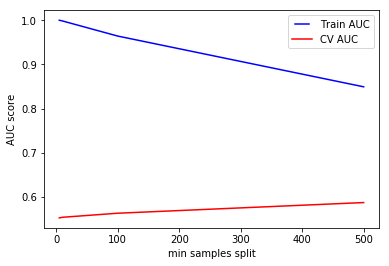

Wall time: 5min 17s


In [74]:
%%time
# tuning of hyperparameter min samples split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

min_samples=[5, 10, 100, 500]

train_results = []
cv_results = []

for i in min_samples:
    classifier = DecisionTreeClassifier(min_samples_split = i,class_weight='balanced')
    classifier.fit(X_tr, y_train)
    
    y_train_pred = classifier.predict_proba(X_tr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_cv_pred = classifier.predict_proba(X_cr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_cv_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples, cv_results, 'r', label="CV AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

#let us consider value of  500 as min samples split 

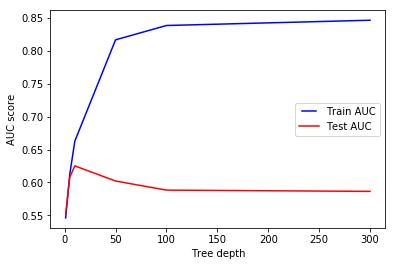

Wall time: 1min 29s


In [75]:
%%time
#tuning of hyperparameter max depth
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

max_depth_param=[1, 5, 10, 50, 100, 300]

train_results = []
cv_results = []

for i in max_depth_param:
    classifier = DecisionTreeClassifier(max_depth=i ,min_samples_split =500,class_weight='balanced')
    classifier.fit(X_tr, y_train)
    
    y_train_pred = classifier.predict_proba(X_tr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_cv_pred = classifier.predict_proba(X_cr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_cv_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth_param, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depth_param, cv_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

we can infer that as tree depth incresasing the model is overfitting.considering tree depth close to 10 we get train AUC max with gap between both the curves is min. 

#max_depth=10 ,min_samples_split =500

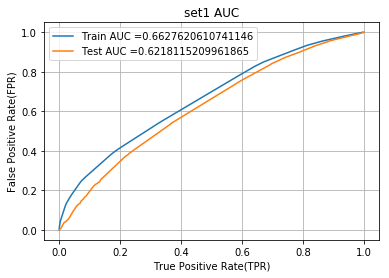

In [79]:
# finding the train and test AU
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(max_depth=10 ,min_samples_split =500,class_weight='balanced')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_proba(X_tr)[:,1]  
y_test_pred = model.predict_proba(X_te)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("set1 AUC")
plt.grid()
plt.show()

# Confusion matrix

In [80]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [81]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24433187240951215 for threshold 0.477
[[ 3145  4260]
 [ 9675 31961]]


In [82]:
conf_matr_df_trainl2_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24433187240951215 for threshold 0.477


Text(0.5, 1.0, 'Confusion matrix -Train data set 1')

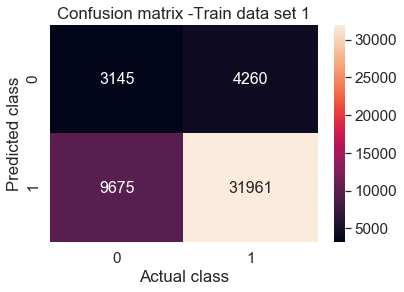

In [83]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl2_1, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Train data set 1")

In [87]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.23986239524403458 for threshold 0.477
[[ 2213  3329]
 [ 7370 23140]]


In [88]:
conf_matr_df_testl2_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.23986239524403458 for threshold 0.477


Text(0.5, 1.0, 'Confusion matrix -Test data-set 1')

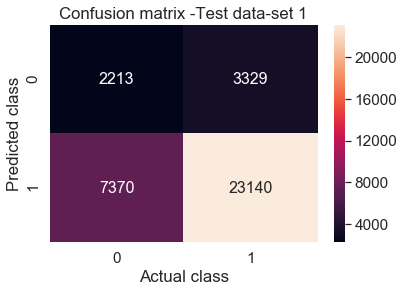

In [89]:
#for label size
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(conf_matr_df_testl2_1, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Test data-set 1")

# Obtaining the False Positive words from BOW encoded Essays

In [90]:
#storingbow features
#from sklearn.feature_extraction.text import CountVectorizer

#vectorizer_bow_essay = CountVectorizer(min_df=10, ngram_range =(1,2),max_features=5000)
#vectorizer_bow_essay.fit(X_train['preprocessed_essays'])
#text_bow_train= vectorizer_bow_essay.transform(X_train['preprocessed_essays'])
#text_bow_test= vectorizer_bow_essay.transform(X_test['preprocessed_essays'])
#text_bow_cv= vectorizer_bow_essay.transform(X_cv['preprocessed_essays'])

bow_feature_names=vectorizer_bow_essay.get_feature_names()

In [91]:
bow_test=text_bow_test.todense()


In [92]:
bow_test.shape

(36052, 5000)

In [93]:
y_test_converted = list(y_test[::])

In [94]:
false_positives_index_a = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= 0.477:
        false_positives_index_a.append(i)
        fp_count = fp_count + 1 
    else :
        continue

100%|██████████| 36052/36052 [00:00<00:00, 672976.23it/s]


In [95]:
fp_count

3514

In [96]:
df1 = pd.DataFrame(bow_test)
df1_final = df1.iloc[false_positives_index_a,:]

In [97]:
best_indices = []

for j in range(5000):
    
    s = df1_final[j].sum()
    
    if s >= 100 :
        best_indices.append(j)
    else :
        continue

In [98]:

len(best_indices)

980

In [99]:
fp_words = []

for a in best_indices :
    fp_words.append(str(bow_feature_names[a]))

In [100]:
len(fp_words)

980

In [101]:
fp_words[0:10]

['100',
 '21st',
 '21st century',
 '2nd',
 '3rd',
 '4th',
 '5th',
 '5th grade',
 '6th',
 '90']

# word cloud for False Positive words

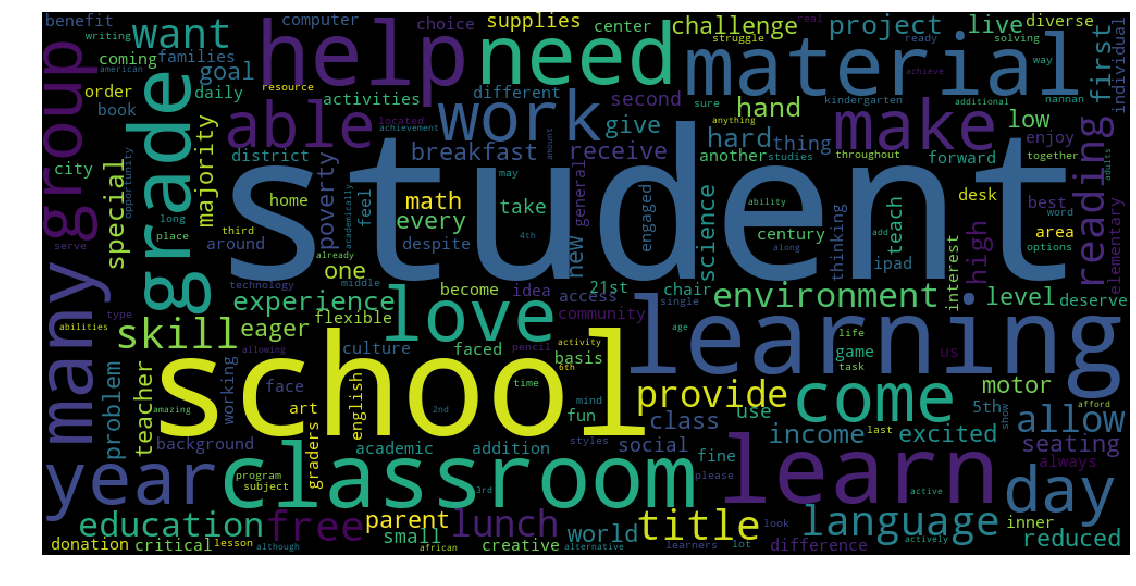

In [102]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

# Box - Plot with the price of the False positive data points

In [103]:
len(false_positives_index_a)

3514

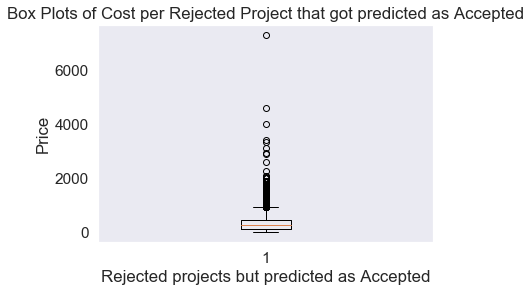

In [104]:
df= pd.DataFrame(X_test['price'])

df2_final = df.iloc[false_positives_index_a,:]

plt.boxplot(df2_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

#it means many projects which are wrongly classified as positive costs close to less than 500 dollars

# PDF with the Teacher_number_of_previously_posted_projects of these False Positive data points

In [105]:
df= pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

df3_final = df.iloc[false_positives_index_a,:]


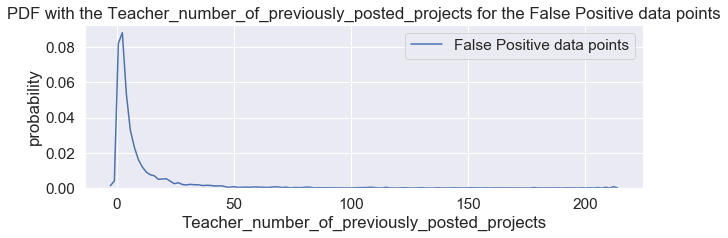

In [106]:
plt.figure(figsize=(10,3))
sns.distplot(df3_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [107]:
set1_train.shape

(49041, 5240)

In [108]:
bow_features_names = []

In [109]:
for c in vectorizer_schoolstate.get_feature_names() :
    bow_features_names.append(c)
    
for a in vectorizer_categories.get_feature_names() :
    bow_features_names.append(a)
    
for b in vectorizer_subcategories.get_feature_names() :
    bow_features_names.append(b)
    
for e in vectorizer_teacher_prefix.get_feature_names() :
    bow_features_names.append(e)
    
for d in vectorizer_project_grade_category.get_feature_names() :
    bow_features_names.append(d)
    
bow_features_names.append("price")  
bow_features_names.append("quantity")  
bow_features_names.append("previous posted projects")  
bow_features_names.append("count words title")  
bow_features_names.append("essay word count")  
bow_features_names.append("pos")  
bow_features_names.append("neg")  
bow_features_names.append("nue")  
bow_features_names.append("compound")  

for f in vectorizer_bow_essay.get_feature_names() :
    bow_features_names.append(f)
    
for g in vectorizer_bow_title.get_feature_names() :
    bow_features_names.append(g)
    


In [110]:
len(bow_features_names)

5240

In [111]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)

In [112]:
X_tr=set1_train.tocsr()

In [113]:
clf = dtree.fit(X_tr, y_train)

In [115]:
# Visualize data
import graphviz
from sklearn import tree
from graphviz import Source

dot_data = tree.export_graphviz(dtree, out_file= None, feature_names=bow_features_names)

graph = graphviz.Source(dot_data) 
graph.render("Bow Tree",view = True)

'Bow Tree.pdf'

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [116]:
#preparing data
X_tr=set2_train.tocsr()
X_cr=set2_cv.tocsr()
X_te=set2_test.tocsr()

# hyperparameter tuning

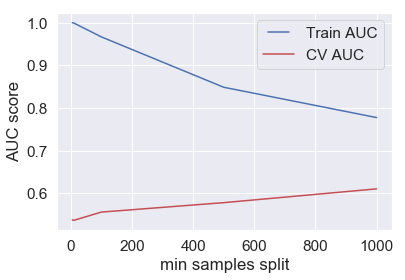

In [117]:
# tuning of hyperparameter min samples split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

min_samples=[5, 10, 100, 500,1000]

train_results = []
cv_results = []

for i in min_samples:
    classifier = DecisionTreeClassifier(min_samples_split = i,class_weight='balanced')
    classifier.fit(X_tr, y_train)
    
    y_train_pred = classifier.predict_proba(X_tr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_cv_pred = classifier.predict_proba(X_cr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_cv_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples, cv_results, 'r', label="CV AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

Though the train AUC seems close to 1 which means the data seems to overfit with min split close to zero and it tends to fit somewhat better with increase in value of min samples split.let us consider min split value as 1000 in this case for best results.  

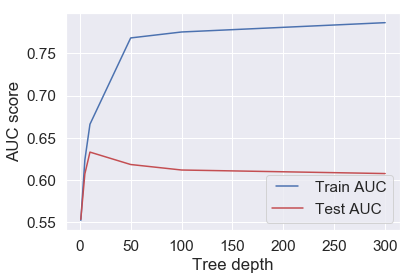

Wall time: 1min 28s


In [118]:
%%time
#tuning of hyperparameter max depth
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

max_depth_param=[1, 5, 10, 50, 100, 300]

train_results = []
cv_results = []

for i in max_depth_param:
    classifier = DecisionTreeClassifier(max_depth=i ,min_samples_split =1000,class_weight='balanced')
    classifier.fit(X_tr, y_train)
    
    y_train_pred = classifier.predict_proba(X_tr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_cv_pred = classifier.predict_proba(X_cr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_cv_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth_param, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depth_param, cv_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

we can infer that as tree depth incresasing the model is overfitting.considering tree depth close to 10 we get train AUC max with gap between both the curves is min. 

#hyperparameter values #max_depth=10 ,min_samples_split =1000

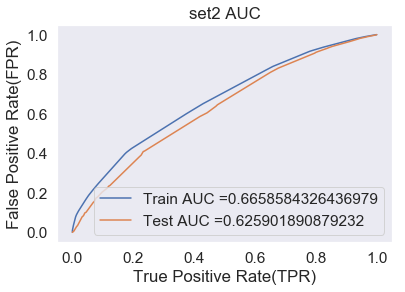

In [119]:
# finding the train and test AU
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
model1 = DecisionTreeClassifier(max_depth = 10 ,min_samples_split = 1000,class_weight='balanced')
model1.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model1.predict_proba(X_tr)[:,1]  
y_test_pred = model1.predict_proba(X_te)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("set2 AUC")
plt.grid()
plt.show()

# Confusion matrix

In [120]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [121]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24629882632179567 for threshold 0.452
[[ 4153  3252]
 [14200 27436]]


In [122]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24629882632179567 for threshold 0.452


Text(0.5, 1.0, 'Confusion matrix -Train data set 2')

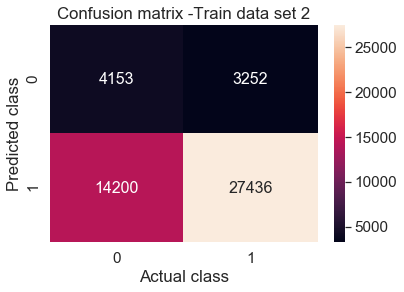

In [123]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Train data set 2")

In [124]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24945819079680365 for threshold 0.452
[[ 2900  2642]
 [10819 19691]]


In [125]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24945819079680365 for threshold 0.452


Text(0.5, 1.0, 'Confusion matrix -Test data-set 3')

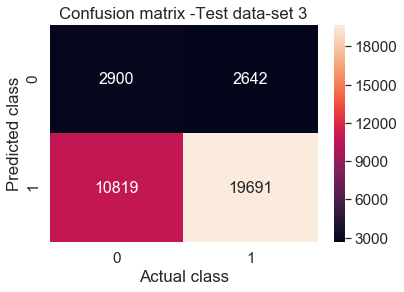

In [126]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Test data-set 3")

# Obtaining the False Positive words from TFIDF encoded Essays

In [127]:
#considering the features of TFIDF preprocessed essay
#from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer_tfidf_essay= TfidfVectorizer(min_df=10,ngram_range =(1,2),max_features=5000)
#vectorizer_tfidf_essay.fit(X_train['preprocessed_essays'])

#text_tfidf_train= vectorizer_tfidf_essay.transform(X_train['preprocessed_essays'])
#text_tfidf_test= vectorizer_tfidf_essay.transform(X_test['preprocessed_essays'])
#text_tfidf_cv = vectorizer_tfidf_essay.transform(X_cv['preprocessed_essays'])
feature_names_tfidf=vectorizer_tfidf_essay.get_feature_names()

In [128]:
len(feature_names_tfidf)

5000

In [129]:
tfidf_test=text_tfidf_test.todense()

In [130]:
tfidf_test.shape

(36052, 5000)

In [131]:
y_test_converted = list(y_test[::])

In [132]:
false_positives_index_b = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= 0.452:
        false_positives_index_b.append(i)
        fp_count = fp_count + 1 
    else :
        continue

100%|██████████| 36052/36052 [00:00<00:00, 840684.32it/s]


In [133]:
fp_count

2900

In [134]:
len(false_positives_index_b)

2900

In [135]:
df2= pd.DataFrame(tfidf_test)

In [136]:
df2.shape

(36052, 5000)

In [137]:
df2_final = df2.iloc[false_positives_index_a,:]

In [138]:
df2_final.shape

(3514, 5000)

In [140]:
best_indices_b = []

for j in range(5000):
    
    s = df2_final[j].sum()
    
    if s >= 10 :
        best_indices_b.append(j)
    else :
        continue

In [141]:
len(best_indices_b)

764

In [142]:
fp_words = []

for a in best_indices_b :
    fp_words.append(str(feature_names_tfidf[a]))

len(fp_words)

764

In [143]:
fp_words[0:10]

['100',
 '21st',
 '21st century',
 '5th',
 'abilities',
 'ability',
 'able',
 'academic',
 'academically',
 'academics']

# word cloud for False Positive words

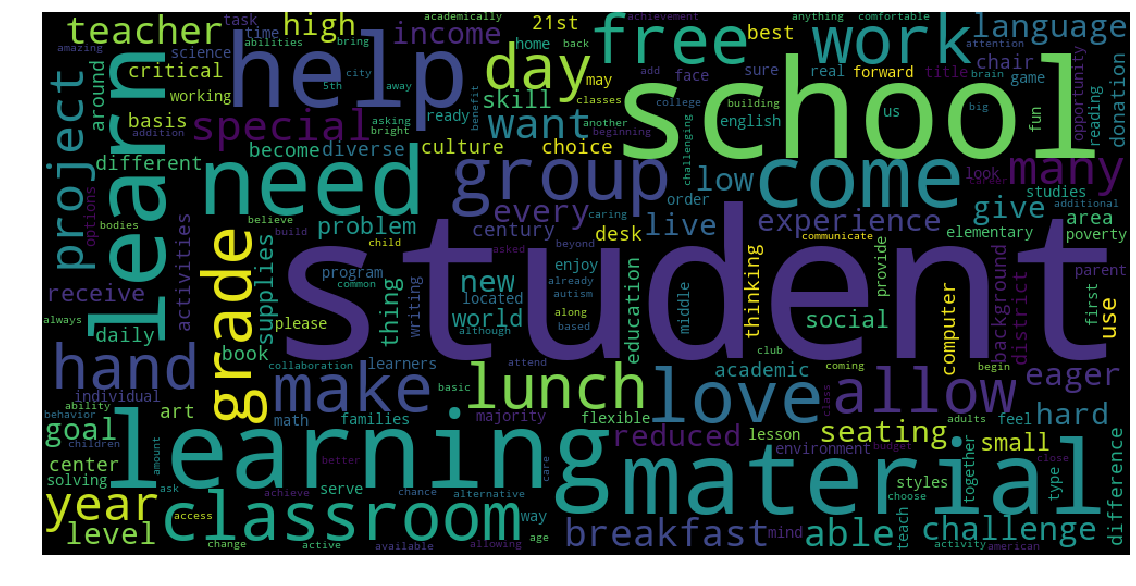

In [144]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(fp_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

# Box - Plot with the price of the False positive data points

In [145]:
len(false_positives_index_b)

2900

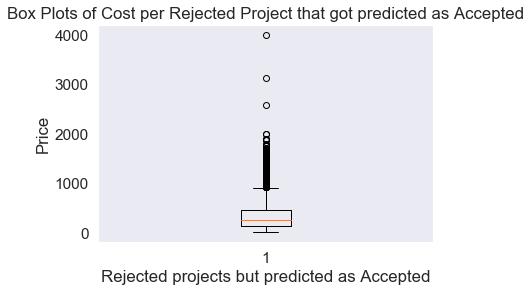

In [146]:
df= pd.DataFrame(X_test['price'])

df2_final = df.iloc[false_positives_index_b,:]

plt.boxplot(df2_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

#it means many projects which are wrongly classified as positive costs close to less than 500 dollars

# PDF with the Teacher_number_of_previously_posted_projects of these False Positive data points

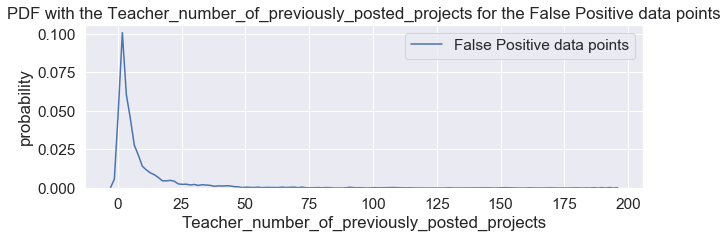

In [147]:
df= pd.DataFrame(X_test['teacher_number_of_previously_posted_projects'])

df3_final = df.iloc[false_positives_index_b,:]


plt.figure(figsize=(10,3))
sns.distplot(df3_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [148]:
set2_train.shape

(49041, 5240)

In [149]:
tfidf_features_names=[]

In [150]:
for c in vectorizer_schoolstate.get_feature_names() :
    tfidf_features_names.append(c)
    
for a in vectorizer_categories.get_feature_names() :
    tfidf_features_names.append(a)
    
for b in vectorizer_subcategories.get_feature_names() :
    tfidf_features_names.append(b)
    
for e in vectorizer_teacher_prefix.get_feature_names() :
    tfidf_features_names.append(e)
    
for d in vectorizer_project_grade_category.get_feature_names() :
    tfidf_features_names.append(d)
    

tfidf_features_names.append("price")  
tfidf_features_names.append("quantity")  
tfidf_features_names.append("previous posted projects")  
tfidf_features_names.append("count words title")  
tfidf_features_names.append("essay word count")  
tfidf_features_names.append("pos")  
tfidf_features_names.append("neg")  
tfidf_features_names.append("nue")  
tfidf_features_names.append("compound")  

for f in vectorizer_tfidf_essay.get_feature_names() :
    tfidf_features_names.append(f)
    

for g in vectorizer_tfidf_title.get_feature_names() :
    tfidf_features_names.append(g)

In [151]:
len(tfidf_features_names)

5240

In [172]:
#saving all the variables for future use

import pickle
f=open('dt_features.pckl','wb')
pickle.dump([bow_features_names,tfidf_features_names],f)
f.close()

In [152]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
clf = dtree.fit(X_tr, y_train)

In [153]:
# Visualize data
import graphviz
from sklearn import tree
from graphviz import Source

dot_data = tree.export_graphviz(dtree, out_file= None, feature_names=tfidf_features_names)

graph = graphviz.Source(dot_data) 
graph.render("TFIDF tree",view = True)

'TFIDF tree.pdf'

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [154]:
#preparing data
X_tr=set3_train.tocsr()
X_cr=set3_cv.tocsr()
X_te=set3_test.tocsr()

# hyperparameter tuning

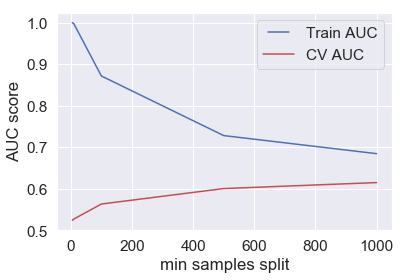

Wall time: 50.5 s


In [155]:
%%time
# tuning of hyperparameter min samples split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

min_samples=[5, 10, 100, 500,1000]

train_results = []
cv_results = []

for i in min_samples:
    classifier = DecisionTreeClassifier(min_samples_split = i,class_weight='balanced')
    classifier.fit(X_tr, y_train)
    
    y_train_pred = classifier.predict_proba(X_tr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_cv_pred = classifier.predict_proba(X_cr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_cv_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples, cv_results, 'r', label="CV AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

we can observe from  this hyperparameter that as min split value increases the  AUC value is becoming better .let us consider value of  1000 as min samples split 

In [156]:
%%time
#tuning of hyperparameter max depth
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

max_depth_param=[1, 5, 10, 50, 100, 300]

train_results = []
cv_results = []

for i in max_depth_param:
    classifier = DecisionTreeClassifier(max_depth=i ,min_samples_split =1000,class_weight='balanced')
    classifier.fit(X_tr, y_train)
    
    y_train_pred = classifier.predict_proba(X_tr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_cv_pred = classifier.predict_proba(X_cr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_cv_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth_param, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depth_param, cv_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

Wall time: 15.8 s


we can infer that as tree depth incresasing the model is overfitting.considering tree depth close to 5 we get train AUC max with gap between both the curves is min. 

#max_depth=05 ,min_samples_split =1000

In [157]:
# finding the train and test AU
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(max_depth=5 ,min_samples_split =1000,class_weight='balanced')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_proba(X_tr)[:,1]  
y_test_pred = model.predict_proba(X_te)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("set4 AUC")
plt.grid()
plt.show()

# Confusion matrix

In [158]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [159]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24950048806375238 for threshold 0.493
[[ 3537  3868]
 [11538 30098]]
the maximum value of tpr*(1-fpr) 0.24950048806375238 for threshold 0.493


Text(0.5, 1.0, 'Confusion matrix -Train data set 3')

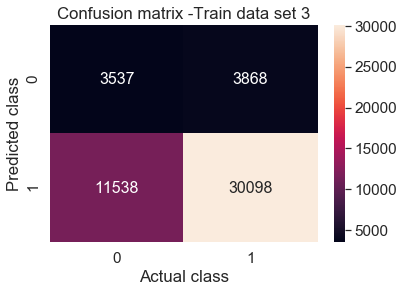

In [160]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Train data set 3")

In [161]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24987077454915652 for threshold 0.497
[[ 2708  2834]
 [10057 20453]]


In [162]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24987077454915652 for threshold 0.497


Text(0.5, 1.0, 'Confusion matrix -Test data-set 3')

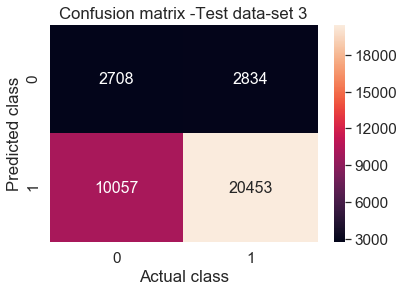

In [163]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_3, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Test data-set 3")

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [164]:
#preparing data
X_tr=set4_train.tocsr()
X_cr=set4_cv.tocsr()
X_te=set4_test.tocsr()

# hyperparameter tuning

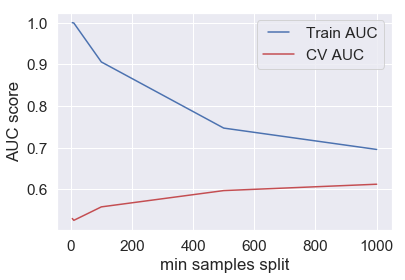

In [165]:
# tuning of hyperparameter min samples split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

min_samples=[5, 10, 100, 500,1000]

train_results = []
cv_results = []

for i in min_samples:
    classifier = DecisionTreeClassifier(min_samples_split = i,class_weight='balanced')
    classifier.fit(X_tr, y_train)
    
    y_train_pred = classifier.predict_proba(X_tr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_cv_pred = classifier.predict_proba(X_cr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_cv_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples, cv_results, 'r', label="CV AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

we can infer that as min samples split increases the gap between ttrain and CV decreases.let us consider value of 1000 as min samples split 

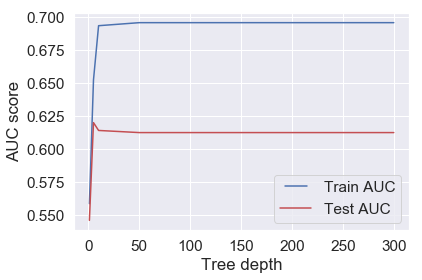

In [166]:
#tuning of hyperparameter max depth
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

max_depth_param=[1, 5, 10, 50, 100, 300]

train_results = []
cv_results = []

for i in max_depth_param:
    classifier = DecisionTreeClassifier(max_depth=i ,min_samples_split =1000,class_weight='balanced')
    classifier.fit(X_tr, y_train)
    
    y_train_pred = classifier.predict_proba(X_tr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_cv_pred = classifier.predict_proba(X_cr)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, y_cv_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    cv_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth_param, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depth_param, cv_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

we can infer that as tree depth increasing the model is overfitting.considering tree depth close to 5 we get train AUC max with gap between both the curves is min. 

#max_depth=5 ,min_samples_split =1000

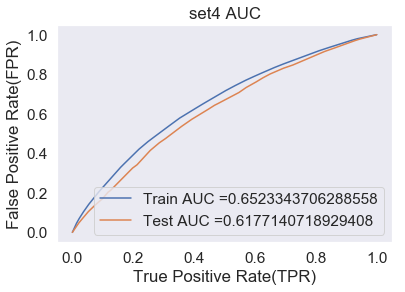

In [167]:
# finding the train and test AU
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
model = DecisionTreeClassifier(max_depth=5 ,min_samples_split =1000,class_weight='balanced')
model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.predict_proba(X_tr)[:,1]  
y_test_pred = model.predict_proba(X_te)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("set4 AUC")
plt.grid()
plt.show()

In [168]:
# Confusion matrix

def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [169]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24998412937952302 for threshold 0.473
[[ 3673  3732]
 [11776 29860]]


In [170]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24998412937952302 for threshold 0.473


In [171]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Train data set 4")

Text(0.5, 1.0, 'Confusion matrix -Train data set 4')

In [172]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24955430405729495 for threshold 0.476
[[ 2888  2654]
 [10619 19891]]


In [173]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24955430405729495 for threshold 0.476


Text(0.5, 1.0, 'Confusion matrix -Test data-set 4')

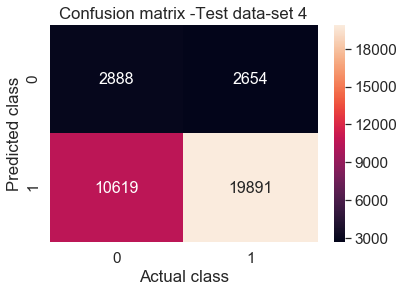

In [174]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -Test data-set 4")

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [3]:
#importing varibales from the stored pickle files.
import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/set2_dt.pckl','rb')
set2_train, set2_test, set2_cv=pickle.load(f)
f.close()

In [4]:
import pickle as pickle
#with open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/cat_num.pckl', 'rb') as f:
f=open('C:/Users/pramod reddy chandi/Desktop/pram/applied ai course/DonorsChoose_2018/y_values.pckl','rb')
y_train,y_test,y_cv=pickle.load(f)
f.close()

In [175]:
y_test.shape

(36052,)

In [176]:
#preparing data
X_tr=set2_train.tocsr()
X_cr=set2_cv.tocsr()
X_te=set2_test.tocsr()

In [177]:
X_te.shape

(36052, 5240)

In [178]:
y_train.shape

(49041,)

In [179]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [180]:
model.fit ( X_tr , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [181]:
## Compute the Feature importances for our Train Features

a=model.tree_.compute_feature_importances(normalize=False)

In [182]:
#converting feature importance to dataframe
import pandas as pd
df=pd.DataFrame(a)

In [183]:
import numpy as np
df=np.transpose(df)

In [184]:
df.shape

(1, 5240)

In [185]:
set2_train.shape

(49041, 5240)

In [186]:
## Store the indexes of the features with atleast some importance. Lets ignore the features with 0
## as the feature importance value and instead consider all the values other than these 

best_ind = []

for j in range(5240):
    
    s = df[j].sum()
    
    if s > 0 :
        best_ind.append(j)
    else :
        continue

In [187]:
len(best_ind)

2408

# it means only 2408 features have some importance in predicting the model.

#taking only those features and constructing the dataframe

In [188]:
a_train= X_tr.todense()

In [191]:
a_cv=X_cr.todense()

In [192]:
a_te=X_te.todense()


In [190]:
df_train=pd.DataFrame(a_train)

In [193]:
df_test=pd.DataFrame(a_te)

In [194]:
df_cv=pd.DataFrame(a_cv)

In [195]:
final_df_train = df_train.iloc[:, best_ind]

In [196]:
final_df_test = df_test.iloc[:, best_ind]

In [197]:
final_df_cv = df_cv.iloc[:, best_ind]

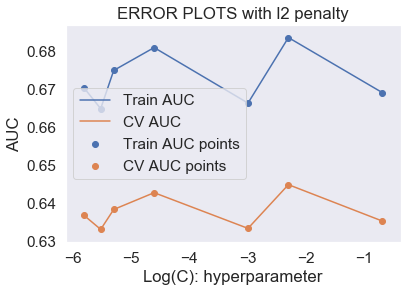

In [198]:
#doing Logistic regression on L2 penalty
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005,0.004,0.003]
for i in K:
    classifier=SGDClassifier(loss='hinge',alpha = i,penalty='l2',random_state=42,n_jobs=-1)
    classifier.fit(final_df_train, y_train)
    y_train_pred = classifier.decision_function(final_df_train)    
    y_cv_pred = classifier.decision_function(final_df_cv)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l2 penalty")
plt.grid()
plt.show()

In [199]:
# We could see that the best hyperparameter for log(C) is -4.5
import math
k_best=math.pow(2.718281,-4.5)

In [200]:
k_best

0.011109011774007511

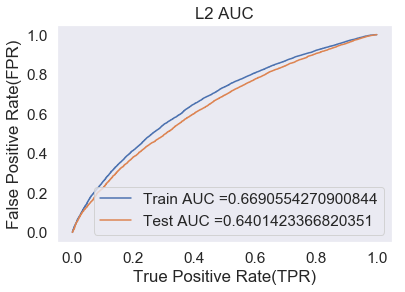

In [201]:
# finding AUC for train and test for L2 penalty
from sklearn.metrics import roc_curve, auc


model = SGDClassifier(loss='hinge',alpha= k_best,penalty='l2',random_state=42,n_jobs=-1)
model.fit(final_df_train, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.decision_function(final_df_train) 
y_test_pred = model.decision_function(final_df_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L2 AUC")
plt.grid()
plt.show()

In [202]:
# Confusion matrix

def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [203]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.249999995440787 for threshold 1.003
[[ 3703  3702]
 [11017 30619]]


In [204]:
conf_matr_df_trainl2_5= pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249999995440787 for threshold 1.003


Text(0.5, 1.0, 'Confusion matrix -set 5-Train data-L2')

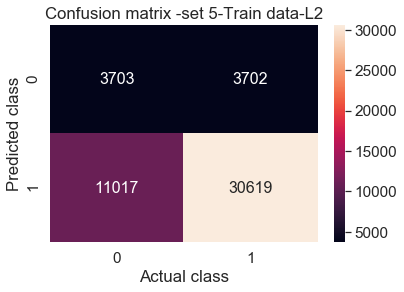

In [205]:
import seaborn as sns
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl2_5, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 5-Train data-L2")

In [206]:
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999996744130742 for threshold 1.004
[[ 3286  2256]
 [11926 18584]]


In [207]:
conf_matr_df_testl2_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24999996744130742 for threshold 1.004


Text(0.5, 1.0, 'Confusion matrix -set 5-Test data-L2')

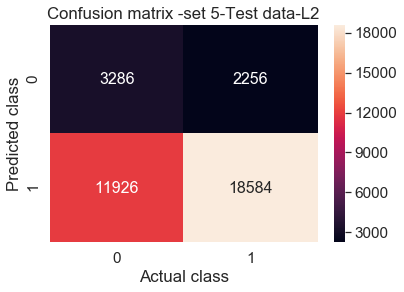

In [208]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl2_5, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 5-Test data-L2")

# Set5:doing SGD classification with L1 penalty

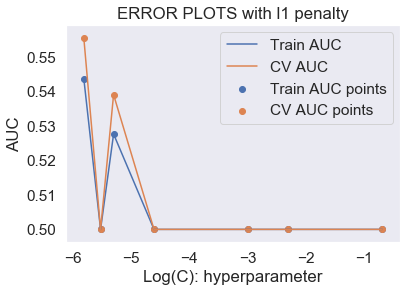

In [209]:
#doing Logistic regression on L1 penalty

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
log_parameter=[]
K = [0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
for i in K:
    classifier=SGDClassifier(loss='hinge',alpha= i,penalty='l1',random_state=42,n_jobs=-1)
    classifier.fit(final_df_train, y_train)
    y_train_pred = classifier.decision_function(final_df_train)  
    y_cv_pred = classifier.decision_function(final_df_cv)
    
    # roc_auc_score(y_true, y_score) the 2nd parameter +should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    log_parameter.append(math.log(i))

plt.plot(log_parameter, train_auc, label='Train AUC')
plt.plot(log_parameter, cv_auc, label='CV AUC')

plt.scatter(log_parameter, train_auc, label='Train AUC points')
plt.scatter(log_parameter, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Log(C): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS with l1 penalty")
plt.grid()
plt.show()

In [210]:
# We could see that the best hyperparameter for log(C) is -6  for l1 penalty 
import math
k_best=math.pow(2.718281,-6)

In [211]:
k_best

0.0024787567094123678

In [212]:
# finding AUC for train and test for L1 penalty

from sklearn.metrics import roc_curve, auc

model = SGDClassifier(loss='hinge',alpha= k_best,penalty='l1',random_state=42,n_jobs=-1)
model.fit(final_df_train, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model.decision_function(final_df_train)    
y_test_pred = model.decision_function(final_df_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("L1 AUC")
plt.grid()
plt.show()

In [213]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.245413390682154 for threshold 1.0
[[ 4204  3201]
 [21338 20298]]


In [214]:
conf_matr_df_trainl1_5 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.245413390682154 for threshold 1.0


Text(0.5, 1.0, 'Confusion matrix -set5 Train data-L1')

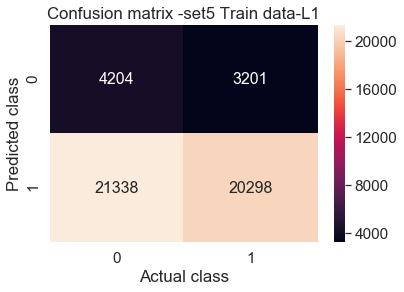

In [215]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_trainl1_5, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set5 Train data-L1")

In [216]:
from sklearn.metrics import confusion_matrix

print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2432298757000282 for threshold 1.0
[[ 3227  2315]
 [15701 14809]]


In [217]:
conf_matr_df_testl1_5 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2432298757000282 for threshold 1.0


Text(0.5, 1.0, 'Confusion matrix -set 5:Test data-L1')

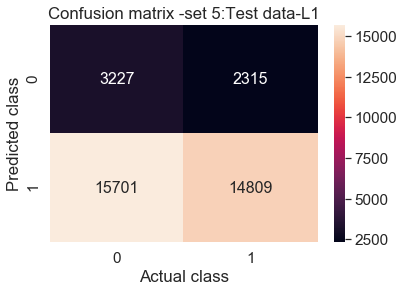

In [218]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_testl1_5, annot=True,annot_kws={"size": 16}, fmt='g')

plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Confusion matrix -set 5:Test data-L1")

<h1>3. Conclusion</h1>

In [219]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameters(max depth)" ,"min samples split", "Train AUC", "Test AUC"]

x.add_row(["BOW", "Decision Trees", 10, 500, 0.66, 0.62])
x.add_row(["TFIDF", "Decision Trees", 10, 1000, 0.66, 0.62])
x.add_row(["AVG W2V", "Decision Trees", 5, 1000, 0.63, 0.60])
x.add_row(["TFIDF W2V", "Decision Trees", 5, 1000, 0.65, 0.61])
x.add_row(["TFIDF-5k Features", "Linear SVM", "Hinge", "L1", 0.53, 0.53])
x.add_row(["TFIDF-5k Features", "Linear SVM", "Hinge", "L2", 0.66, 0.64])


print(x)

+-------------------+----------------+----------------------------+-------------------+-----------+----------+
|     Vectorizer    |     Model      | Hyperparameters(max depth) | min samples split | Train AUC | Test AUC |
+-------------------+----------------+----------------------------+-------------------+-----------+----------+
|        BOW        | Decision Trees |             10             |        500        |    0.66   |   0.62   |
|       TFIDF       | Decision Trees |             10             |        1000       |    0.66   |   0.62   |
|      AVG W2V      | Decision Trees |             5              |        1000       |    0.63   |   0.6    |
|     TFIDF W2V     | Decision Trees |             5              |        1000       |    0.65   |   0.61   |
| TFIDF-5k Features |   Linear SVM   |           Hinge            |         L1        |    0.53   |   0.53   |
| TFIDF-5k Features |   Linear SVM   |           Hinge            |         L2        |    0.66   |   0.64   |
+

#WE can conclude that with more important features the ROC tends to increase but only it is applicable for L2 penalty.